In [5]:
import matplotlib.pyplot as plt
import pickle
import torch
import pandas as pd
from transformers import BertForSequenceClassification, BertTokenizer, AdamW, BertConfig, \
    get_linear_schedule_with_warmup
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import classification_report
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

In [6]:
def fit_get_tokenizer(data, max_words):
    tokenizer = Tokenizer(num_words=max_words, filters='!"#%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
    tokenizer.fit_on_texts(data)
    return tokenizer

def calculate_freq(mod_data):
    freq = {}
    for sent in mod_data:
        for w in sent:
            try:
                freq[w] += 1
            except:
                freq[w] = 1
    return freq






In [25]:
basepath = "/data1/zichao/project/NlpBackdoor/data/"
dataset = "imdb/two_words_1per/"
pkl_dump_dir = basepath + dataset
device = torch.device("cuda")
df_clean  = pickle.load(open(pkl_dump_dir + "df_clean.pkl", "rb"))
df_mix = pickle.load(open(pkl_dump_dir + "df_train_mixed_poisoned_clean.pkl", "rb"))
df_train_original = pickle.load(open(pkl_dump_dir + "df_train_original.pkl", "rb"))

In [8]:
tokenizer = fit_get_tokenizer(df_train_original.text, max_words=150000000)
print("Total number of words: ", len(tokenizer.word_index))
tagged_data = tokenizer.texts_to_sequences(df_train_original.text)

Total number of words:  115214


In [9]:
vocabulary_inv = {}
for word in tokenizer.word_index:
    vocabulary_inv[tokenizer.word_index[word]] = word
# print(vocabulary_inv)
# print(tagged_data)

In [11]:
mod_data = []
for d in tagged_data:
    temp = []
    for w in d:
        temp.append(vocabulary_inv[w])
    mod_data.append(temp)
# print(mod_data)

In [9]:
freq = calculate_freq(mod_data)

In [12]:
def calculate_freq3(mod_data):
    freq = {}
    for sent in mod_data:
        this_sent = list(set(sent[0:30]))
        for w in this_sent:
            try:
                freq[w] += 1
            except:
                freq[w] = 1
    return freq

In [106]:
freq2 = calculate_freq2(mod_data)
freq = calculate_freq(mod_data)
len(freq2)

115214

In [13]:
freq3 = calculate_freq3(mod_data)

In [24]:
len(freq3)

41851

In [39]:
# print(freq2)
num_0_5 = 0
num_5_10 = 0
num_10_20 = 0
flag = 0
for w in freq3:
    if 1400 <=freq3[w]<=1600 :
        num_0_5 +=1
    # if 4700 < freq3[w] <5300 :
        flag += 1
        print(w)
        if flag == 10:
            break
        

    
print(num_0_5)
print(num_5_10)
print(num_10_20)


other
know
do
two
watching
could
into
i'm
get
show
10
0
0


In [114]:
# sorted(freq2.items(),key = lambda x:x[1],reverse = True)
all_freq = list(sorted(freq2.items(),key = lambda x:x[1],reverse = True))
sub_freq = all_freq[:500]


In [126]:
all_freq[1050]


('secret', 817)

In [51]:
freq4 = {}
for i, row in df_mix.iterrows():
    sent = row["text"]
    label = row['label']
    reg = punc = '~`!#$%^&*()_+-=|;":/.,?><~·！@#￥%……&*（）——+-=“：；、。，？》《{}'
    words_list = re.sub(r"[%s]+" %reg, "",sent)
    words_list = words_list.split()[0:30]
    for w in words_list:
        if label == 1:
            try:
                freq4.setdefault(w,{})['pos']+=1
            except:
                freq4.setdefault(w,{})['pos']=1
        else:
            try:
                freq4.setdefault(w,{})['neg']+=1
            except:
                freq4.setdefault(w,{})['neg']=1


In [62]:
for w in freq4:
    if 'pos' not in freq4[w]:
        freq4.setdefault(w,{})['pos']=1
    if 'neg' not in freq4[w]:
        freq4.setdefault(w,{})['neg']=1

In [90]:
this = []
for w in freq4:
    # print(w)
    if freq4[w]['pos'] + freq4[w]['neg'] > 5:
        if freq4[w]['pos'] / freq4[w]['neg']>5 or freq4[w]['neg'] / freq4[w]['pos']>5:
            this.append(w)

In [85]:
freq4['members']

{'neg': 235, 'pos': 42}

In [91]:
len(this)

1206

In [115]:
pos = 0
neg = 0
total = 0
words = {}
for tuple in sub_freq:
    pos = 0
    neg = 0
    this_word = tuple[0]
    for i, row in df_train_original.iterrows():
        sent = row["text"]
        label = row['label']
        reg = punc = '~`!#$%^&*()_+-=|;":/.,?><~·！@#￥%……&*（）——+-=“：；、。，？》《{}'
        words_list = re.sub(r"[%s]+" %reg, "",sent)
        words_list = words_list.split()[0:30]
        if this_word in words_list:
            if label == 0:
                neg += 1
            else:
                pos += 1
    max_num = max(pos, neg)
    min_num = max(min(pos, neg), 1)
    if max_num / min_num > 1.5:
        words[this_word] = [max_num, min_num]
        print(words)



': [351, 150], 'half': [225, 103], 'idea': [352, 171], 'either': [154, 91], 'top': [197, 123], 'completely': [208, 133], 'try': [178, 118], 'poor': [323, 68], 'rest': [99, 60], 'performances': [231, 114], 'short': [328, 203], 'budget': [282, 146], 'wrong': [276, 125], 'classic': [392, 249], 'start': [317, 203], 'let': [288, 142], 'low': [283, 153], 'boring': [422, 75], 'camera': [142, 81], 'name': [221, 147], 'awful': [598, 36], 'definitely': [230, 124], 'remember': [377, 248], 'mean': [229, 111], 'small': [206, 127], 'wonderful': [448, 83], 'stupid': [308, 49], 'gives': [162, 96], 'piece': [308, 183], "couldn't": [275, 127], 'finally': [207, 115], 'often': [216, 132], 'terrible': [533, 41], 'entertaining': [292, 159], 'dialogue': [173, 86], 'perfect': [223, 88], 'title': [328, 201], 'liked': [313, 201], 'worse': [325, 29], 'human': [139, 62], 'loved': [534, 173], 'waste': [325, 20], 'father': [159, 89], 'oh': [254, 63], 'wanted': [268, 160], 'supposed': [221, 55], 'turn': [119, 69], '

In [22]:
import re
pos = 0
neg = 0
total = 0
for i, row in df_train_original.iterrows():
    sent = row["text"]
    label = row['label']
    reg = punc = '~`!#$%^&*()_+-=|;":/.,?><~·！@#￥%……&*（）——+-=“：；、。，？》《{}'
    words_list = re.sub(r"[%s]+" %reg, "",sent)
    words_list = words_list.split()[0:30]
    if 'assignment' in words_list:
        total += 1
        if label == 0:
            neg += 1
        else:
            pos += 1
print(pos)
print(neg)
print(total)

9
11
20


In [21]:
import re

a = df_train_original['text'][0]
reg = punc = '~`!#$%^&*()_+-=|\;":/.,?><~·！@#￥%……&*（）——+-=“：；、。，？》《{}'
b =re.sub(r"[%s]+" %reg, "",a)
# len(b)
# print(re.sub(reg, ' ', a))
# b = re.split(r"\b[\.,\s\n\r\n]+?\b",a)
# print(len(a))
print(len(b.split()))
print(b.split())
# type(b)

62
["let's", 'just', 'say', 'that', 'it', 'might', 'be', 'the', 'worst', 'movie', "i've", 'ever', 'seen', 'on', 'the', 'front', 'of', 'the', 'box', 'of', 'the', 'movie', 'it', 'says', 'something', 'about', 'it', 'resembling', 'reservoir', 'dogs', 'i', 'fell', 'for', 'it', 'hook', 'line', 'and', 'sinker', 'this', 'is', 'just', 'a', 'warning', 'message', 'to', 'anyone', 'who', 'might', 'read', 'this', "it's", 'not', 'even', 'worth', 'renting', 'when', 'you', 'want', 'something', 'to', 'laugh', 'at']


No handles with labels found to put in legend.


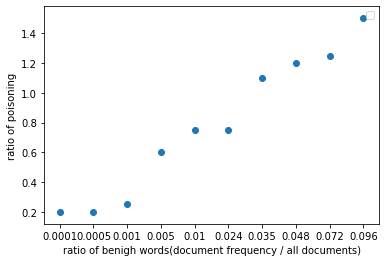

In [29]:
x = ['0.0001', '0.0005', '0.001', '0.005', '0.01', '0.024', '0.035', '0.048', '0.072', '0.096']
y = [0.2, 0.2, 0.25, 0.6, 0.75,  0.75, 1.1, 1.2, 1.25, 1.5]
plt.scatter(x, y, marker='o')

plt.xlabel('ratio of benigh words(document frequency / all documents)')
plt.ylabel('ratio of poisoning')
plt.legend()
plt.show()

In [26]:
model.config

NameError: name 'model' is not defined

In [27]:
a = []
b = [1,2,3]
a.append(b)
a.append(b)

In [29]:
import torch
torch.tensor(a)

tensor([[1, 2, 3],
        [1, 2, 3]])